In [ ]:
'''
 * Copyright (c) 2018 Radhamadhab Dalai
 *
 * Permission is hereby granted, free of charge, to any person obtaining a copy
 * of this software and associated documentation files (the "Software"), to deal
 * in the Software without restriction, including without limitation the rights
 * to use, copy, modify, merge, publish, distribute, sublicense, and/or sell
 * copies of the Software, and to permit persons to whom the Software is
 * furnished to do so, subject to the following conditions:
 *
 * The above copyright notice and this permission notice shall be included in
 * all copies or substantial portions of the Software.
 *
 * THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR
 * IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY,
 * FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE
 * AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER
 * LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM,
 * OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN
 * THE SOFTWARE.
'''

# Multilayer Perceptrons (MLPs)

## Overview

Multilayer Perceptrons (MLPs) are a class of neural networks characterized by their feedforward layered structure. An MLP typically consists of an input layer, one or more hidden layers, and an output layer. 

## MLP with One Hidden Layer

Consider a general MLP with one hidden layer. The network consists of:

- **Input Layer**: Contains \( n_i \) units.
- **Hidden Layer**: Contains \( p \) units.
- **Output Layer**: Contains \( n_o \) units.

In the context of auto-association, where dimension reduction is desired, the MLP is designed such that:

- The number of input units and output units are the same: \( n_i = n_o = n \).
- The number of hidden units \( p \) is less than the number of input units \( n \): \( p < n \).

### Auto-Association Example

In this particular application, the hidden layer acts as a limited capacity bottleneck, encoding the input vectors optimally. The structure of this MLP is often visualized as an hourglass, where the input and output layers have the same dimension, and the hidden layer has a reduced dimension.

### Mathematical Representation

When an \( n \)-dimensional real input vector \( \mathbf{x}_k \) (where \( k = 1, \ldots, N \)) is fed into the network, the output values of the hidden units form a \( p \)-vector. This is given by:

$$
\mathbf{h}_k = F \left( W^{(1)} \mathbf{x}_k + \mathbf{b}^{(1)} \right)
$$

where:

- \( W^{(1)} \) is the \( p \times n \) weight matrix connecting the input layer to the hidden layer.
- \( \mathbf{b}^{(1)} \) is a \( p \)-dimensional vector of biases.
- \( F \) denotes the activation function applied element-wise.

### Figure: MLP with One Hidden Layer

Below is a schematic representation of the MLP with one hidden layer for auto-association:

![MLP with One Hidden Layer](en1.jpg)

The shape of the network resembles an hourglass, with the hidden layer acting as a bottleneck.

## Summary

This MLP configuration is used in auto-association tasks where the goal is to reduce the dimensionality of input vectors through a hidden layer while preserving essential information for reconstruction in the output layer.


In [1]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
import numpy as np

# Define the model parameters
input_dim = 784  # Example input dimension (e.g., 28x28 images)
hidden_units = 64  # Number of units in the hidden layer
output_dim = 784  # Output dimension (same as input for auto-association)

# Create the model
model = Sequential([
    Dense(hidden_units, input_dim=input_dim, activation='relu', name='hidden_layer'),
    Dense(output_dim, activation='sigmoid', name='output_layer')
])

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001),
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Generate some example data
x_train = np.random.rand(1000, input_dim)  # 1000 samples, each of dimension 784
y_train = x_train  # For auto-association, output is the same as input

# Train the model
model.fit(x_train, y_train, epochs=10, batch_size=32)

# Evaluate the model
loss, accuracy = model.evaluate(x_train, y_train)
print(f'Loss: {loss:.4f}, Accuracy: {accuracy:.4f}')


2024-07-30 19:39:08.066222: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-07-30 19:39:20.252149: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2024-07-30 19:39:20.252186: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2024-07-30 19:39:20.899162: E tensorflow/stream_executor/cuda/cuda_blas.cc:2981] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-07-30 19:40:11.042814: W tensorflow/stream_executor/platform/de

Epoch 1/10
32/32 [==============================] - 4s 11ms/step - loss: 0.6935 - accuracy: 0.0010
Epoch 2/10
32/32 [==============================] - 0s 6ms/step - loss: 0.6931 - accuracy: 0.0000e+00
Epoch 3/10
32/32 [==============================] - 0s 7ms/step - loss: 0.6931 - accuracy: 0.0000e+00
Epoch 4/10
32/32 [==============================] - 0s 5ms/step - loss: 0.6930 - accuracy: 0.0000e+00
Epoch 5/10
32/32 [==============================] - 0s 6ms/step - loss: 0.6930 - accuracy: 0.0020
Epoch 6/10
32/32 [==============================] - 0s 7ms/step - loss: 0.6929 - accuracy: 0.0000e+00
Epoch 7/10
32/32 [==============================] - 0s 6ms/step - loss: 0.6929 - accuracy: 0.0010
Epoch 8/10
32/32 [==============================] - 0s 7ms/step - loss: 0.6928 - accuracy: 0.0010
Epoch 9/10
32/32 [==============================] - 0s 5ms/step - loss: 0.6928 - accuracy: 0.0000e+00
Epoch 10/10
32/32 [==============================] - 0s 5ms/step - loss: 0.6927 - accuracy: 0.002

In [2]:
import torch
import torch.nn as nn
import torch.optim as optim

# Define the model parameters
input_dim = 784  # Example input dimension (e.g., 28x28 images)
hidden_units = 64  # Number of units in the hidden layer
output_dim = 784  # Output dimension (same as input for auto-association)

# Define the MLP model
class MLP(nn.Module):
    def __init__(self):
        super(MLP, self).__init__()
        self.fc1 = nn.Linear(input_dim, hidden_units)
        self.fc2 = nn.Linear(hidden_units, output_dim)
        self.relu = nn.ReLU()
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        x = self.relu(self.fc1(x))
        x = self.sigmoid(self.fc2(x))
        return x

model = MLP()

# Define the loss function and optimizer
criterion = nn.BCELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Generate some example data
x_train = torch.rand(1000, input_dim)  # 1000 samples, each of dimension 784
y_train = x_train  # For auto-association, output is the same as input

# Training loop
epochs = 10
for epoch in range(epochs):
    model.train()
    optimizer.zero_grad()
    outputs = model(x_train)
    loss = criterion(outputs, y_train)
    loss.backward()
    optimizer.step()
    
    print(f'Epoch [{epoch+1}/{epochs}], Loss: {loss.item():.4f}')

# Evaluation
model.eval()
with torch.no_grad():
    outputs = model(x_train)
    loss = criterion(outputs, y_train)
    print(f'Final Loss: {loss.item():.4f}')


Epoch [1/10], Loss: 0.6954
Epoch [2/10], Loss: 0.6934
Epoch [3/10], Loss: 0.6933
Epoch [4/10], Loss: 0.6932
Epoch [5/10], Loss: 0.6932
Epoch [6/10], Loss: 0.6932
Epoch [7/10], Loss: 0.6931
Epoch [8/10], Loss: 0.6931
Epoch [9/10], Loss: 0.6931
Epoch [10/10], Loss: 0.6930
Final Loss: 0.6930


In [3]:
#withouimport numpy as np

# Activation functions and their derivatives
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(x):
    return sigmoid(x) * (1 - sigmoid(x))

def mean_squared_error(y_true, y_pred):
    return np.mean((y_true - y_pred) ** 2)

# Initialize parameters
input_dim = 784  # Example input dimension (e.g., 28x28 images)
hidden_units = 64  # Number of units in the hidden layer
output_dim = 784  # Output dimension (same as input for auto-association)

# Initialize weights and biases
np.random.seed(42)
W1 = np.random.randn(input_dim, hidden_units) * 0.01  # Input to hidden layer
b1 = np.zeros((1, hidden_units))  # Bias for hidden layer
W2 = np.random.randn(hidden_units, output_dim) * 0.01  # Hidden to output layer
b2 = np.zeros((1, output_dim))  # Bias for output layer

# Learning rate
learning_rate = 0.01

# Generate example data
x_train = np.random.rand(1000, input_dim)  # 1000 samples, each of dimension 784
y_train = x_train  # For auto-association, output is the same as input

# Training loop
epochs = 10
for epoch in range(epochs):
    # Forward pass
    z1 = np.dot(x_train, W1) + b1
    a1 = sigmoid(z1)
    z2 = np.dot(a1, W2) + b2
    a2 = sigmoid(z2)

    # Compute loss
    loss = mean_squared_error(y_train, a2)
    print(f'Epoch {epoch+1}/{epochs}, Loss: {loss:.4f}')

    # Backward pass
    error = a2 - y_train
    d_a2 = error * sigmoid_derivative(z2)
    
    error_hidden_layer = np.dot(d_a2, W2.T)
    d_a1 = error_hidden_layer * sigmoid_derivative(z1)
    
    # Update weights and biases
    W2 -= learning_rate * np.dot(a1.T, d_a2)
    b2 -= learning_rate * np.sum(d_a2, axis=0, keepdims=True)
    W1 -= learning_rate * np.dot(x_train.T, d_a1)
    b1 -= learning_rate * np.sum(d_a1, axis=0, keepdims=True)

# Final evaluation
print('Training completed.')


Epoch 1/10, Loss: 0.0834
Epoch 2/10, Loss: 0.0875
Epoch 3/10, Loss: 0.0846
Epoch 4/10, Loss: 0.0834
Epoch 5/10, Loss: 0.0833
Epoch 6/10, Loss: 0.0832
Epoch 7/10, Loss: 0.0832
Epoch 8/10, Loss: 0.0832
Epoch 9/10, Loss: 0.0832
Epoch 10/10, Loss: 0.0832
Training completed.


## Autoencoders in Object Recognition

In the context of object recognition, a particularly interesting and challenging question is whether unsupervised learning can be used to learn hierarchies of invariant feature extractors. Autoencoders provide an effective way to solve this problem. The basic idea of the autoencoder, proposed by Rumelhart et al. in 1986, is the layer-by-layer training.

### Invariant Features

Features that are invariant to small distortions are called invariant features. The key idea to invariant feature learning is to represent an input patch with two components:
- **Invariant Feature Vector**: Represents what is in the image.
- **Transformation Parameters**: Encodes where each feature appears in the image.

### Architecture of Autoencoders

An autoencoder is an MLP with a symmetric structure, used to learn an efficient representation (encoding) for a set of data in an unsupervised manner. The aim of an autoencoder is to make the output as similar to the input as possible.

Architecturally, the simplest form of an autoencoder is a feedforward, non-recurrent neural network very similar to many single-layer perceptrons in an MLP. It consists of:
- **Input Layer**
- **Hidden Layers**
- **Output Layer** (also known as the reconstruction layer)

The output layer has the same number of nodes as the input layer.

### Purpose of Autoencoders

Autoencoders are designed to reconstruct their own inputs rather than predicting a target value \( Y \) given inputs \( X \). Therefore, autoencoders are unsupervised learning models.

### Components of an Autoencoder

An autoencoder is composed of two main networks:
1. **Encoder Network**: Compresses the input into a latent representation.
2. **Decoder Network**: Reconstructs the input from the latent representation.

### Symmetry in Autoencoders

The autoencoder is always symmetrical:
- The **middle layer** (comprising one or two layers, depending on whether the number of neural network layers is odd or even) acts as the bottleneck.
- The layer **in front of the middle layer** is the encoding layer.
- The layer **behind the middle layer** is the decoding layer.

### Example Architecture

The architecture of a basic autoencoder can be visualized as follows:

\[
\text{Input Layer} \rightarrow \text{Encoder Layer(s)} \rightarrow \text{Latent Space} \rightarrow \text{Decoder Layer(s)} \rightarrow \text{Output Layer}
\]

Where:
- **Input Layer** and **Output Layer** have the same number of nodes.
- **Encoder** reduces the dimensionality of the input.
- **Decoder** attempts to reconstruct the original input from the reduced representation.

This symmetrical structure ensures that the autoencoder learns a compact representation of the input data.

![Autoencoder Architecture](en2.png)  <!-- Placeholder for image visualization -->


## Autoencoders: Architecture and Training

### Encoder Network

The encoder function \( f(x) \) maps the original high-dimensional inputs \( x \in \mathbb{R}^n \) to a low-dimensional feature representation \( h \in \mathbb{R}^p \):

$$
h = f(x) = s_f(W^{(1)} x + b_h) \quad \text{where} \quad n > p
$$

Here:
- \( h \) is the feature vector or code computed from \( x \),
- \( W^{(1)} \in \mathbb{R}^{p \times n} \) is the encoding matrix,
- \( s_f \) is an elementwise nonlinear activation function, typically the logistic sigmoid function:

$$
s_f(z_i) = \text{sigmoid}(z_i) = \frac{1}{1 + e^{-z_i}}
$$

The encoder’s parameters include a bias vector \( b_h \in \mathbb{R}^p \).

### Decoder Network

The symmetric decoder \( g(h) \) maps \( h \) back to an \( n \)-dimensional output vector, producing a reconstruction \( y = g(h) \) that should be as similar as possible to the original input vector \( x \), i.e., \( y = \hat{x} \):

$$
y = g(h) = s_g(W^{(2)} h + b_y) \quad \text{where} \quad p < n
$$

Here:
- \( W^{(2)} \in \mathbb{R}^{n \times p} \) is the decoding matrix,
- \( g \) is an elementwise nonlinear function, and \( s_g \) is the decoder’s activation function, typically either the identity function (for linear reconstruction) or a sigmoid function,
- The decoder’s parameters include a bias vector \( b_y \in \mathbb{R}^n \).

In general, one explores the tied weights case, where \( W^{(2)} = (W^{(1)})^T = W^T \).

### Autoencoder Training

The input layer and output layer have the same number of neurons \( n \), which is larger than the number \( p \) of neurons in the hidden layer. The middle hidden layer acts as the bottleneck of the autoencoder. The goal of training an autoencoder is to find parameters \( \theta = \{W, b_h, b_y\} \) that minimize the reconstruction error on a training set \( D_n \):

$$
\min_\theta J_{AE}(\theta) = \sum_{x \in D_n} L(x, g(f(x)))
$$

where \( L(x, y) \) is the reconstruction error. Typical choices for the loss function include:

- **Squared Error**:

$$
L(x, y) = \| x - y \|^2
$$

- **Cross-Entropy Loss Function**:

$$
L(x, y) = -\sum_{i=1}^n \left[ x_i \log(y_i) + (1 - x_i) \log(1 - y_i) \right]
$$

### Autoencoder Training Flowchart

The autoencoder training process is illustrated in the following flowchart:

$$
\begin{array}{cccc}
\text{Input} & \xrightarrow{\text{Encoder }} & \text{Feature Vector } h = f(x) & \xrightarrow{\text{Decoder }} & \text{Output } y = \hat{x} \\
& & & & \\
& \text{Reconstruction Error} & & &
\end{array}
$$

### Hidden Layer Activations

For each example \( x_t \) from the dataset \( \{x_1, \dots, x_T\} \), the hidden neurons and activations of the input \( x \) are computed as follows:

$$
\text{net}_j^{(2)} = \sum_{i=1}^n w_j^{(1)} x_i + b_j^{(1)}, \quad j = 1, \dots, m
$$

$$
a_j^{(2)} = f(\text{net}_j^{(2)}), \quad j = 1, \dots, m
$$

Similarly, the hidden neurons and activations of the output layer are:

$$
\text{net}_i^{(3)} = \sum_{j=1}^m w_{ij}^{(2)} a_j^{(2)} + b_i^{(2)}, \quad i = 1, \dots, n
$$

$$
a_i^{(3)} = f(\text{net}_i^{(3)}), \quad i = 1, \dots, n
$$

where \( f \) is a nonlinear activation function, typically the sigmoid function:

$$
f(z) = \frac{1}{1 + e^{-z}}
$$

### Energy of the System

The problem of the basic autoencoder is to find optimal weight matrices \( W^{(1)}, W^{(2)} \) and bias vectors \( b^{(1)}, b^{(2)} \) for minimizing the total error energy of the system. The energy of the system is the sum of two terms:

$$
J_{AE}(\theta) = \frac{1}{2m} \sum_{j=1}^m \| a_j^{(2)} - \text{Encode}(x, W^{(1)}) \|^2 + \frac{1}{2n} \sum_{i=1}^n \| a_i^{(3)} - \text{Decode}(\hat{x}, W^{(2)}) \|^2
$$

where:

- **Code Prediction Energy** \( E_e \):

$$
E_e(a_j^{(2)}, W^{(1)}) = \frac{1}{2} \| a_j^{(2)} - \text{Encode}(x, W^{(1)}) \|^2
$$

- **Reconstruction Energy** \( E_d \):

$$
E_d(a_i^{(3)}, W^{(2)}) = \frac{1}{2} \| a_i^{(3)} - \text{Decode}(\hat{x}, W^{(2)}) \|^2
$$


In [4]:
import numpy as np

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(x):
    return sigmoid(x) * (1 - sigmoid(x))

class Autoencoder:
    def __init__(self, input_size, hidden_size):
        # Initialize weights and biases
        self.input_size = input_size
        self.hidden_size = hidden_size
        self.W1 = np.random.randn(hidden_size, input_size) * 0.01  # Encoder weights
        self.b1 = np.zeros((hidden_size, 1))  # Encoder biases
        self.W2 = np.random.randn(input_size, hidden_size) * 0.01  # Decoder weights
        self.b2 = np.zeros((input_size, 1))  # Decoder biases
    
    def encode(self, x):
        """Encode the input data."""
        return sigmoid(np.dot(self.W1, x.T) + self.b1)
    
    def decode(self, h):
        """Decode the feature vector."""
        return sigmoid(np.dot(self.W2, h) + self.b2)
    
    def forward(self, x):
        """Forward pass through the autoencoder."""
        self.encoded = self.encode(x)
        self.decoded = self.decode(self.encoded)
        return self.decoded
    
    def compute_loss(self, x):
        """Compute the reconstruction loss."""
        return np.mean((x - self.decoded.T) ** 2)
    
    def backward(self, x, learning_rate=0.01):
        """Backpropagation to update weights and biases."""
        m = x.shape[0]
        
        # Compute gradients
        d_output = (self.decoded - x.T) * sigmoid_derivative(self.decoded)
        d_W2 = np.dot(d_output, self.encoded.T) / m
        d_b2 = np.sum(d_output, axis=1, keepdims=True) / m
        
        d_hidden = np.dot(self.W2.T, d_output) * sigmoid_derivative(self.encoded)
        d_W1 = np.dot(d_hidden, x) / m
        d_b1 = np.sum(d_hidden, axis=1, keepdims=True) / m
        
        # Update weights and biases
        self.W1 -= learning_rate * d_W1
        self.b1 -= learning_rate * d_b1
        self.W2 -= learning_rate * d_W2
        self.b2 -= learning_rate * d_b2
    
    def train(self, x, epochs=1000, learning_rate=0.01):
        """Train the autoencoder using gradient descent."""
        for epoch in range(epochs):
            self.forward(x)
            loss = self.compute_loss(x)
            self.backward(x, learning_rate)
            if (epoch + 1) % 100 == 0:
                print(f'Epoch {epoch + 1}/{epochs}, Loss: {loss}')

# Example usage
if __name__ == "__main__":
    # Generate random data
    np.random.seed(0)
    data = np.random.rand(100, 20)  # 100 samples, 20 features

    # Initialize and train autoencoder
    input_size = data.shape[1]
    hidden_size = 10
    autoencoder = Autoencoder(input_size, hidden_size)
    autoencoder.train(data, epochs=1000, learning_rate=0.01)

    # Test encoding and decoding
    test_data = data[0:1]  # Take the first sample
    encoded = autoencoder.encode(test_data)
    decoded = autoencoder.decode(encoded)
    print("Original Data:", test_data)
    print("Decoded Data:", decoded.T)


Epoch 100/1000, Loss: 0.08647789874402455
Epoch 200/1000, Loss: 0.08608855422787445
Epoch 300/1000, Loss: 0.08583052523300583
Epoch 400/1000, Loss: 0.085659436069837
Epoch 500/1000, Loss: 0.08554594467974494
Epoch 600/1000, Loss: 0.08547061903802536
Epoch 700/1000, Loss: 0.0854205811257551
Epoch 800/1000, Loss: 0.08538729480428127
Epoch 900/1000, Loss: 0.08536510247098145
Epoch 1000/1000, Loss: 0.08535025525493067
Original Data: [[0.5488135  0.71518937 0.60276338 0.54488318 0.4236548  0.64589411
  0.43758721 0.891773   0.96366276 0.38344152 0.79172504 0.52889492
  0.56804456 0.92559664 0.07103606 0.0871293  0.0202184  0.83261985
  0.77815675 0.87001215]]
Decoded Data: [[0.51007112 0.54098636 0.44526398 0.49786725 0.54926883 0.54201391
  0.51535621 0.4628755  0.56169283 0.54260375 0.46378982 0.46833193
  0.48931598 0.46413188 0.49378504 0.48052504 0.46661399 0.48413841
  0.53119941 0.55085537]]


## Backpropagation Algorithm for Autoencoder

### Loss Function
The loss function for the autoencoder can be represented as:
$$
J_{\text{AE}}(\theta) = \frac{1}{2m} \sum_{j=1}^{m} \left( a_j^{(2)} - \frac{1}{m} \sum_{i=1}^n x_i \right)^2 + \frac{1}{2n} \sum_{i=1}^n \left( a_i^{(3)} - x_i \right)^2
$$
where \( a_j^{(2)} \) is the activation in the hidden layer and \( a_i^{(3)} \) is the activation in the output layer.

### Gradient Calculation

#### Gradient with respect to Decoder Weights and Biases
Using the chain rule, the partial derivatives of the loss function \( J_{\text{AE}}(\theta) \) with respect to the weights \( w_{ij}^{(2)} \) and biases \( b_i^{(2)} \) are given by:
$$
\frac{\partial J_{\text{AE}}}{\partial w_{ij}^{(2)}} = \frac{\partial J_{\text{AE}}}{\partial a_i^{(3)}} \cdot \frac{\partial a_i^{(3)}}{\partial \text{net}_i^{(3)}} \cdot \frac{\partial \text{net}_i^{(3)}}{\partial w_{ij}^{(2)}}
$$
$$
\frac{\partial J_{\text{AE}}}{\partial b_i^{(2)}} = \frac{\partial J_{\text{AE}}}{\partial a_i^{(3)}} \cdot \frac{\partial a_i^{(3)}}{\partial \text{net}_i^{(3)}} \cdot \frac{\partial \text{net}_i^{(3)}}{\partial b_i^{(2)}}
$$
where
$$
\frac{\partial \text{net}_i^{(3)}}{\partial w_{ij}^{(2)}} = a_j^{(2)}
$$
$$
\frac{\partial \text{net}_i^{(3)}}{\partial b_i^{(2)}} = 1
$$
and
$$
\frac{\partial a_i^{(3)}}{\partial \text{net}_i^{(3)}} = a_i^{(3)} (1 - a_i^{(3)})
$$

#### Gradient with respect to Encoder Weights and Biases
Similarly, for the encoder weights \( w_{ji}^{(1)} \) and biases \( b_j^{(1)} \):
$$
\frac{\partial J_{\text{AE}}}{\partial w_{ji}^{(1)}} = \frac{\partial J_{\text{AE}}}{\partial a_j^{(2)}} \cdot \frac{\partial a_j^{(2)}}{\partial \text{net}_j^{(2)}} \cdot \frac{\partial \text{net}_j^{(2)}}{\partial w_{ji}^{(1)}}
$$
$$
\frac{\partial J_{\text{AE}}}{\partial b_j^{(1)}} = \frac{\partial J_{\text{AE}}}{\partial a_j^{(2)}} \cdot \frac{\partial a_j^{(2)}}{\partial \text{net}_j^{(2)}} \cdot \frac{\partial \text{net}_j^{(2)}}{\partial b_j^{(1)}}
$$
where
$$
\frac{\partial \text{net}_j^{(2)}}{\partial w_{ji}^{(1)}} = x_i
$$
$$
\frac{\partial \text{net}_j^{(2)}}{\partial b_j^{(1)}} = 1
$$
and
$$
\frac{\partial a_j^{(2)}}{\partial \text{net}_j^{(2)}} = a_j^{(2)} (1 - a_j^{(2)})
$$

### Summary of Gradient Updates
- For decoder weights \( W^{(2)} \) and biases \( b^{(2)} \):
$$
W_{ij}^{(2)} \leftarrow W_{ij}^{(2)} - \eta \left( a_j^{(2)} \cdot \sigma_i^{(3)} \right)
$$
$$
b_i^{(2)} \leftarrow b_i^{(2)} - \eta \cdot \sigma_i^{(3)}
$$

- For encoder weights \( W^{(1)} \) and biases \( b^{(1)} \):
$$
W_{ji}^{(1)} \leftarrow W_{ji}^{(1)} - \eta \left( x_i \cdot \sigma_j^{(2)} \right)
$$
$$
b_j^{(1)} \leftarrow b_j^{(1)} - \eta \cdot \sigma_j^{(2)}
$$

where \( \eta \) is the learning rate.

### Chain Rule Derivations
- The derivatives for \( \text{net}_i^{(3)} \):
$$
\frac{\partial \text{net}_i^{(3)}}{\partial w_{ij}^{(2)}} = a_j^{(2)}
$$
$$
\frac{\partial \text{net}_i^{(3)}}{\partial b_i^{(2)}} = 1
$$

- The derivatives for \( \text{net}_j^{(2)} \):
$$
\frac{\partial \text{net}_j^{(2)}}{\partial w_{ji}^{(1)}} = x_i
$$
$$
\frac{\partial \text{net}_j^{(2)}}{\partial b_j^{(1)}} = 1
$$

The backpropagation algorithm updates weights and biases by computing gradients of the loss function with respect to parameters and adjusting them accordingly.



## Algorithm 7.4: Backpropagation Algorithm for the Basic Autoencoder

### Input:
- Data set: \(\{(x^{(j)}, y^{(j)})\}_{j=1}^m\) with \( x^{(j)} = [x^{(j)}_1, \ldots, x^{(j)}_n]^T \)
- Learning rate \(\eta\)
- Threshold \(\text{threshold}\)

### Steps:

1. **Initialization:**
   - Initialize weights \(W^{(1)}, W^{(2)}\) and biases \(b^{(1)}, b^{(2)}\).

2. **For iteration = 1, 2, \ldots, \text{iter}_{\text{max}} do:**

   3. **For example = 1, 2, \ldots, N do:**

      4. **Forward Propagation:**

         5. **Compute activations for the hidden layer:**
            $$
            \text{net}_j^{(2)} = \sum_{i=1}^n w_{ji}^{(1)} x_i + b_j^{(1)}
            $$
            $$
            a_j^{(2)} = f(\text{net}_j^{(2)})
            $$
            for \( j = 1, 2, \ldots, m \)

         6. **Compute activations for the output layer:**
            $$
            \text{net}_i^{(3)} = \sum_{j=1}^m w_{ij}^{(2)} a_j^{(2)} + b_i^{(2)}
            $$
            $$
            a_i^{(3)} = f(\text{net}_i^{(3)})
            $$
            for \( i = 1, 2, \ldots, n \)

      7. **Compute Gradients:**

         8. **If \( J_{\text{AE}}(\theta) > \text{threshold} \) then:**

            9. **Compute error for the output layer:**
               $$
               \sigma_i^{(3)} = a_i^{(3)} \cdot (1 - a_i^{(3)}) \cdot (a_i^{(3)} - x_i)
               $$
               for \( i = 1, \ldots, n \)

            10. **Compute error for the hidden layer:**
                $$
                \sigma_j^{(2)} = \sum_{i=1}^n w_{ji}^{(2)} \sigma_i^{(3)} \cdot a_j^{(2)} \cdot (1 - a_j^{(2)})
                $$
                for \( j = 1, \ldots, m \)

            11. **Update biases and weights:**
                - Update biases for output layer:
                  $$
                  b_i^{(2)} \leftarrow b_i^{(2)} + \sigma_i^{(3)}
                  $$
                  for \( i = 1, \ldots, n \)

                - Update weights for output layer:
                  $$
                  w_{ij}^{(2)} \leftarrow w_{ij}^{(2)} + a_j^{(2)} \cdot \sigma_i^{(3)}
                  $$
                  for \( i = 1, \ldots, n; j = 1, \ldots, m \)

                - Update biases for hidden layer:
                  $$
                  b_j^{(1)} \leftarrow b_j^{(1)} + \sigma_j^{(2)}
                  $$
                  for \( j = 1, \ldots, m \)

                - Update weights for hidden layer:
                  $$
                  w_{ji}^{(1)} \leftarrow w_{ji}^{(1)} + x_i \cdot \sigma_j^{(2)}
                  $$
                  for \( i = 1, \ldots, n; j = 1, \ldots, m \)

            12. **Apply Weight Update:**
                - Update weights for the encoder:
                  $$
                  W^{(1)} = W^{(1)} - \eta \left( \frac{1}{N} \sum_{i=1}^n \Delta W_{i}^{(1)} \right)
                  $$

                - Update weights for the decoder:
                  $$
                  W^{(2)} = W^{(2)} - \eta \left( \frac{1}{N} \sum_{j=1}^m \Delta W_{j}^{(2)} \right)
                  $$

                - Update biases for the encoder:
                  $$
                  b^{(1)} = b^{(1)} - \eta \left( \frac{1}{N} \sum_{j=1}^m \Delta b_j^{(1)} \right)
                  $$

                - Update biases for the decoder:
                  $$
                  b^{(2)} = b^{(2)} - \eta \left( \frac{1}{N} \sum_{i=1}^n \Delta b_i^{(2)} \right)
                  $$

   13. **End For**

2. **End For**

### Output:
- The learned parameters: \( \theta = \{W^{(1)}, b^{(1)}; W^{(2)}, b^{(2)}\} \).

---

## Regularized Autoencoders

### Regularization with Weight Decay:
The regularized objective function with weight decay is:
$$
J_{\text{AE} + \text{wd}}(\theta) = L(x, g(f(x))) + \lambda \sum_{i,j} W_{ij}^2
$$
where \(\lambda\) is a hyperparameter controlling the strength of the regularization.

### Contractive Autoencoder (CAE):
The objective function for the contractive autoencoder is:
$$
J_{\text{CAE}}(\theta) = L(x, g(f(x))) + \lambda \|\frac{\partial h_j(x)}{\partial x_i}\|_F^2
$$
where \(\|\cdot\|_F\) denotes the Frobenius norm and \(\lambda\) is a hyperparameter controlling the strength of the regularization.

The regularization term penalizes the Jacobian matrix \(\frac{\partial h_j(x)}{\partial x_i}\), encouraging the feature mapping to be contractive in the neighborhood of the training data.


In [5]:
import numpy as np

# Activation functions
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(x):
    return x * (1 - x)

class Autoencoder:
    def __init__(self, input_size, hidden_size, learning_rate=0.01):
        self.input_size = input_size
        self.hidden_size = hidden_size
        self.learning_rate = learning_rate
        
        # Initialize weights and biases
        self.W1 = np.random.randn(hidden_size, input_size)
        self.b1 = np.random.randn(hidden_size, 1)
        self.W2 = np.random.randn(input_size, hidden_size)
        self.b2 = np.random.randn(input_size, 1)
    
    def forward(self, X):
        self.z1 = np.dot(self.W1, X.T) + self.b1
        self.a1 = sigmoid(self.z1)
        self.z2 = np.dot(self.W2, self.a1) + self.b2
        self.a2 = sigmoid(self.z2)
        return self.a2.T
    
    def backward(self, X):
        m = X.shape[0]
        # Compute the gradients for W2 and b2
        d_a2 = self.a2 - X.T
        d_z2 = d_a2 * sigmoid_derivative(self.a2)
        d_W2 = np.dot(d_z2, self.a1.T) / m
        d_b2 = np.sum(d_z2, axis=1, keepdims=True) / m
        
        # Compute the gradients for W1 and b1
        d_a1 = np.dot(self.W2.T, d_z2)
        d_z1 = d_a1 * sigmoid_derivative(self.a1)
        d_W1 = np.dot(d_z1, X) / m
        d_b1 = np.sum(d_z1, axis=1, keepdims=True) / m
        
        # Update weights and biases
        self.W1 -= self.learning_rate * d_W1
        self.b1 -= self.learning_rate * d_b1
        self.W2 -= self.learning_rate * d_W2
        self.b2 -= self.learning_rate * d_b2
    
    def train(self, X, epochs=1000):
        for epoch in range(epochs):
            # Forward pass
            self.forward(X)
            # Backward pass
            self.backward(X)
            # Print the cost every 100 epochs
            if epoch % 100 == 0:
                loss = np.mean(np.square(X - self.a2.T))
                print(f'Epoch {epoch}, Loss: {loss}')

# Example usage
if __name__ == "__main__":
    # Generate some example data
    np.random.seed(0)
    X = np.random.rand(100, 10)  # 100 samples, 10 features
    
    # Initialize and train the autoencoder
    autoencoder = Autoencoder(input_size=10, hidden_size=5, learning_rate=0.01)
    autoencoder.train(X, epochs=1000)


Epoch 0, Loss: 0.18021408932161884
Epoch 100, Loss: 0.1729519492406884
Epoch 200, Loss: 0.16559672847300755
Epoch 300, Loss: 0.15816609422465985
Epoch 400, Loss: 0.15071575072704024
Epoch 500, Loss: 0.14333483678353326
Epoch 600, Loss: 0.1361335397111424
Epoch 700, Loss: 0.12922815110318328
Epoch 800, Loss: 0.12272663587659004
Epoch 900, Loss: 0.11671609187222151


$$
\textbf{Autoencoders and Their Extensions}
$$

$$
\text{Autoencoders are a type of neural network used for unsupervised learning. There are several major extensions of autoencoders, including:}
$$

$$
\text{1. Stacked Autoencoder}
$$
$$
\text{2. Sparse Autoencoder}
$$
$$
\text{3. Stacked Sparse Autoencoder}
$$
$$
\text{4. Stacked Denoising Autoencoder}
$$
$$
\text{5. Stacked Convolutional Autoencoder}
$$
$$
\text{6. Stacked Denoising Convolutional Autoencoder}
$$

$$
\textbf{Stacked Autoencoder}
$$

$$
\text{A stacked autoencoder is a multilayer neural network where each layer is the hidden layer of the previous autoencoder and the input layer of the next autoencoder. It can be viewed as multiple autoencoders connected successively in a greedy layer-wise fashion.}
$$

$$
\text{Let } x_t^{(d)} \text{ be the input to the } d\text{-th stacked autoencoder, where } x_t^{(1)} = x_t.
$$

$$
h_t^{(d)} = f\left(W_1^{(d)} x_t^{(d)} + b_1^{(d)}\right)
$$

$$
y_t^{(d)} = f\left(W_2^{(d)} h_t^{(d)} + b_2^{(d)}\right)
$$

$$
\text{where } h_t^{(d)} \text{ and } y_t^{(d)} \text{ denote, respectively, the feature representation at the hidden layer and the output at the output layer of the } d\text{-th autoencoder.}
$$

$$
\text{The activation function } f(\cdot) \text{ is usually the sigmoid function:}
$$

$$
f(x) = \frac{1}{1 + \exp(-x)}
$$

$$
\text{The objective function for the } d\text{-th autoencoder is:}
$$

$$
J\left(W_1^{(d)}, b_1^{(d)}, W_2^{(d)}, b_2^{(d)}\right) = \frac{1}{2T} \sum_{t=1}^T \left\| y_t^{(d)} - x_t^{(d)} \right\|^2 + \frac{\beta}{2} \left(\left\| W_1^{(d)} \right\|^2 + \left\| W_2^{(d)} \right\|^2\right)
$$

$$
\text{where } \beta \text{ is a regularization parameter.}
$$

$$
\textbf{Sparse Autoencoder}
$$

$$
\text{A sparse autoencoder introduces a sparsity constraint on the hidden layer activations, encouraging a more efficient representation of the input data.}
$$

$$
\text{The average activation } \hat{\rho}_j \text{ of the } j\text{-th neuron is:}
$$

$$
\hat{\rho}_j = \frac{1}{T} \sum_{t=1}^T x_{t,j}
$$

$$
\text{To enforce sparsity, the Kullback-Leibler (KL) divergence between } \hat{\rho}_j \text{ and } \rho \text{ is added as a regularization term:}
$$

$$
\text{KL}(\rho \parallel \hat{\rho}) = \sum_{j=1}^n \left[ \rho \log \frac{\rho}{\hat{\rho}_j} + (1 - \rho) \log \frac{1 - \rho}{1 - \hat{\rho}_j} \right]
$$

$$
\text{The final cost function of the sparse autoencoder is:}
$$

$$
J_{\text{SAE}}(W, b) = J_{\text{AE}}(W, b) + \beta \text{KL}(\rho \parallel \hat{\rho}) + \frac{\lambda}{2} \sum_{l=1}^L \left\| W^{(l)} \right\|^2
$$

$$
\text{where:}
$$

$$
\beta \text{ controls the sparsity penalty term}
$$
$$
\lambda \text{ controls the weight decay}
$$
$$
s_l \text{ and } s_{l+1} \text{ are the sizes of adjacent layers}
$$

$$
\textbf{Stacked Sparse Autoencoder}
$$

$$
\text{A stacked sparse autoencoder combines the stacked and sparse autoencoders. It connects multiple sparse autoencoders end-to-end, allowing for higher-level feature representations.}
$$

$$
\text{The objective function for the } d\text{-th layer of a stacked sparse autoencoder is:}
$$

$$
J_{\text{SSAE}}^{(d)} = \frac{1}{2T} \sum_{t=1}^T \left\| y_t^{(d)} - x_t^{(d)} \right\|^2 + \beta \sum_{j=1}^{K_d} \text{KL}(\rho \parallel \hat{\rho}_j^{(d)}) + \alpha \left( \left\| W_1^{(d)} \right\|^2 + \left\| W_2^{(d)} \right\|^2 \right)
$$

$$
\text{where:}
$$

$$
K_d \text{ is the number of hidden units in the } d\text{-th layer}
$$
$$
\alpha \text{ is the weight decay parameter}
$$
$$
\beta \text{ is the weight of the sparsity penalty}
$$
$$
\rho \text{ is the sparsity parameter}
$$
$$
\hat{\rho}_j^{(d)} \text{ is the average activation of the } j\text{-th hidden unit in the } d\text{-th layer}
$$
$$
\text{KL}(\rho \parallel \hat{\rho}_j^{(d)}) \text{ denotes the KL divergence between } \rho \text{ and } \hat{\rho}_j^{(d)}
$$

$$
\text{The parameters are updated using stochastic gradient descent:}
$$

$$
W_1^{(d)} \leftarrow W_1^{(d)} - \eta \frac{1}{T} \sum_{i=1}^T \delta_i^{(d)} h_i^{(d)} + \alpha W_1^{(d)}
$$

$$
W_2^{(d)} \leftarrow W_2^{(d)} - \eta \frac{1}{T} \sum_{i=1}^T \delta_i^{(d)} h_i^{(d)} + \alpha W_2^{(d)}
$$

$$
b_1^{(d)} \leftarrow b_1^{(d)} - \eta \frac{1}{T} \sum_{i=1}^T \delta_i^{(d)}
$$

$$
b_2^{(d)} \leftarrow b_2^{(d)} - \eta \frac{1}{T} \sum_{i=1}^T \delta_i^{(d)}
$$

$$
\text{where } \eta \text{ is the learning rate, and:}
$$

$$
\delta_i^{(d)} = W_2^{(d)} \delta_i^{(d)} + \beta \left(- \frac{\rho}{\hat{\rho}_i^{(d)}} + \frac{1 - \rho}{1 - \hat{\rho}_i^{(d)}}\right) f\left(W_1^{(d)} x_i^{(d)} + b_1^{(d)}\right)
$$

$$
\delta_i^{(d)} = y_i^{(d)} - x_i^{(d)} f\left(W_2^{(d)} h_i^{(d)} + b_2^{(d)}\right)
$$

$$
\textbf{Stacked Denoising Autoencoder}
$$

$$
\text{A denoising autoencoder is trained to reconstruct clean data from noisy inputs, which makes it robust to noise.}
$$

$$
\text{The cost function is:}
$$

$$
J_{\text{DAE}} = \frac{1}{2T} \sum_{t=1}^T \left\| \hat{x}_t - x_t \right\|^2
$$

$$
\text{where } \hat{x}_t \text{ is the reconstruction of the clean data from the noisy input.}
$$

$$
\textbf{Stacked Convolutional Autoencoder}
$$

$$
\text{A convolutional autoencoder uses convolutional layers for encoding and decoding, making it suitable for image data.}
$$

$$
\text{The architecture includes:}
$$

$$
\text{1. Convolutional layers for encoding}
$$
$$
\text{2. Transposed convolutional (deconvolution) layers for decoding}
$$

$$
\text{The objective function is similar to the basic autoencoder but adapted for convolutional layers.}
$$

$$
\textbf{Stacked Denoising Convolutional Autoencoder}
$$

$$
\text{Combines the denoising and convolutional autoencoder concepts, making it suitable for noisy image data.}
$$

$$
\text{The architecture is similar to the stacked convolutional autoencoder but with noise added to the input images.}
$$


In [6]:
import torch
import torch.nn as nn
import torch.optim as optim

# Define a basic Autoencoder
class Autoencoder(nn.Module):
    def __init__(self, input_dim, hidden_dim):
        super(Autoencoder, self).__init__()
        self.encoder = nn.Sequential(
            nn.Linear(input_dim, hidden_dim),
            nn.ReLU()
        )
        self.decoder = nn.Sequential(
            nn.Linear(hidden_dim, input_dim),
            nn.Sigmoid()
        )
    
    def forward(self, x):
        encoded = self.encoder(x)
        decoded = self.decoder(encoded)
        return decoded

# Define Stacked Autoencoder
class StackedAutoencoder(nn.Module):
    def __init__(self, layers):
        super(StackedAutoencoder, self).__init__()
        self.autoencoders = nn.ModuleList()
        for i in range(len(layers) - 1):
            self.autoencoders.append(Autoencoder(layers[i], layers[i + 1]))
    
    def forward(self, x):
        for autoencoder in self.autoencoders:
            x = autoencoder(x)
        return x

# Define Sparse Autoencoder
class SparseAutoencoder(Autoencoder):
    def __init__(self, input_dim, hidden_dim, rho, beta):
        super(SparseAutoencoder, self).__init__(input_dim, hidden_dim)
        self.rho = rho
        self.beta = beta
    
    def kl_divergence(self, rho, rho_hat):
        return rho * torch.log(rho / rho_hat) + (1 - rho) * torch.log((1 - rho) / (1 - rho_hat))
    
    def forward(self, x):
        encoded = self.encoder(x)
        decoded = self.decoder(encoded)
        return decoded

    def loss_function(self, output, input, rho_hat):
        mse_loss = nn.MSELoss()(output, input)
        kl_loss = self.kl_divergence(self.rho, rho_hat)
        return mse_loss + self.beta * kl_loss

# Define Stacked Sparse Autoencoder
class StackedSparseAutoencoder(StackedAutoencoder):
    def __init__(self, layers, rho, beta):
        super(StackedSparseAutoencoder, self).__init__(layers)
        self.rho = rho
        self.beta = beta
    
    def kl_divergence(self, rho, rho_hat):
        return rho * torch.log(rho / rho_hat) + (1 - rho) * torch.log((1 - rho) / (1 - rho_hat))
    
    def loss_function(self, outputs, inputs, rho_hats):
        loss = 0
        for output, input, rho_hat in zip(outputs, inputs, rho_hats):
            mse_loss = nn.MSELoss()(output, input)
            kl_loss = self.kl_divergence(self.rho, rho_hat)
            loss += mse_loss + self.beta * kl_loss
        return loss

# Define Denoising Autoencoder
class DenoisingAutoencoder(Autoencoder):
    def __init__(self, input_dim, hidden_dim, noise_factor=0.5):
        super(DenoisingAutoencoder, self).__init__(input_dim, hidden_dim)
        self.noise_factor = noise_factor
    
    def add_noise(self, x):
        noise = torch.normal(mean=0, std=self.noise_factor, size=x.size())
        return x + noise
    
    def forward(self, x):
        x_noisy = self.add_noise(x)
        encoded = self.encoder(x_noisy)
        decoded = self.decoder(encoded)
        return decoded

# Define Convolutional Autoencoder
class ConvolutionalAutoencoder(nn.Module):
    def __init__(self):
        super(ConvolutionalAutoencoder, self).__init__()
        self.encoder = nn.Sequential(
            nn.Conv2d(1, 16, kernel_size=5, stride=1, padding=2),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2)
        )
        self.decoder = nn.Sequential(
            nn.ConvTranspose2d(16, 1, kernel_size=5, stride=1, padding=2),
            nn.Sigmoid()
        )
    
    def forward(self, x):
        x = self.encoder(x)
        x = self.decoder(x)
        return x

# Define Denoising Convolutional Autoencoder
class DenoisingConvolutionalAutoencoder(ConvolutionalAutoencoder):
    def __init__(self, noise_factor=0.5):
        super(DenoisingConvolutionalAutoencoder, self).__init__()
        self.noise_factor = noise_factor
    
    def add_noise(self, x):
        noise = torch.normal(mean=0, std=self.noise_factor, size=x.size())
        return x + noise
    
    def forward(self, x):
        x_noisy = self.add_noise(x)
        x = self.encoder(x_noisy)
        x = self.decoder(x)
        return x

# Example usage
if __name__ == "__main__":
    # Define parameters
    input_dim = 784
    hidden_dim = 256
    rho = 0.1
    beta = 3e-3
    noise_factor = 0.5
    layers = [input_dim, 512, 256, hidden_dim]
    
    # Create models
    stacked_autoencoder = StackedAutoencoder(layers)
    sparse_autoencoder = SparseAutoencoder(input_dim, hidden_dim, rho, beta)
    stacked_sparse_autoencoder = StackedSparseAutoencoder(layers, rho, beta)
    denoising_autoencoder = DenoisingAutoencoder(input_dim, hidden_dim, noise_factor)
    convolutional_autoencoder = ConvolutionalAutoencoder()
    denoising_convolutional_autoencoder = DenoisingConvolutionalAutoencoder(noise_factor)
    
    # Print model summaries
    print("Stacked Autoencoder:")
    print(stacked_autoencoder)
    
    print("Sparse Autoencoder:")
    print(sparse_autoencoder)
    
    print("Stacked Sparse Autoencoder:")
    print(stacked_sparse_autoencoder)
    
    print("Denoising Autoencoder:")
    print(denoising_autoencoder)
    
    print("Convolutional Autoencoder:")
    print(convolutional_autoencoder)
    
    print("Denoising Convolutional Autoencoder:")
    print(denoising_convolutional_autoencoder)


Stacked Autoencoder:
StackedAutoencoder(
  (autoencoders): ModuleList(
    (0): Autoencoder(
      (encoder): Sequential(
        (0): Linear(in_features=784, out_features=512, bias=True)
        (1): ReLU()
      )
      (decoder): Sequential(
        (0): Linear(in_features=512, out_features=784, bias=True)
        (1): Sigmoid()
      )
    )
    (1): Autoencoder(
      (encoder): Sequential(
        (0): Linear(in_features=512, out_features=256, bias=True)
        (1): ReLU()
      )
      (decoder): Sequential(
        (0): Linear(in_features=256, out_features=512, bias=True)
        (1): Sigmoid()
      )
    )
    (2): Autoencoder(
      (encoder): Sequential(
        (0): Linear(in_features=256, out_features=256, bias=True)
        (1): ReLU()
      )
      (decoder): Sequential(
        (0): Linear(in_features=256, out_features=256, bias=True)
        (1): Sigmoid()
      )
    )
  )
)
Sparse Autoencoder:
SparseAutoencoder(
  (encoder): Sequential(
    (0): Linear(in_features=

In [3]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np

# Define a basic Autoencoder
class Autoencoder(nn.Module):
    def __init__(self, input_dim, hidden_dim):
        super(Autoencoder, self).__init__()
        self.encoder = nn.Sequential(
            nn.Linear(input_dim, hidden_dim),
            nn.ReLU()
        )
        self.decoder = nn.Sequential(
            nn.Linear(hidden_dim, input_dim),
            nn.Sigmoid()
        )
    
    def forward(self, x):
        encoded = self.encoder(x)
        decoded = self.decoder(encoded)
        return decoded

# Define Stacked Autoencoder
class StackedAutoencoder(nn.Module):
    def __init__(self, layers):
        super(StackedAutoencoder, self).__init__()
        self.autoencoders = nn.ModuleList()
        for i in range(len(layers) - 1):
            self.autoencoders.append(Autoencoder(layers[i], layers[i + 1]))
    
    def forward(self, x):
        for autoencoder in self.autoencoders:
            x = autoencoder(x)
        return x

# Define Sparse Autoencoder
class SparseAutoencoder(Autoencoder):
    def __init__(self, input_dim, hidden_dim, rho, beta):
        super(SparseAutoencoder, self).__init__(input_dim, hidden_dim)
        self.rho = rho
        self.beta = beta
    
    def kl_divergence(self, rho, rho_hat):
        return rho * torch.log(rho / rho_hat) + (1 - rho) * torch.log((1 - rho) / (1 - rho_hat))
    
    def forward(self, x):
        encoded = self.encoder(x)
        decoded = self.decoder(encoded)
        return decoded

    def loss_function(self, output, input, rho_hat):
        mse_loss = nn.MSELoss()(output, input)
        kl_loss = self.kl_divergence(self.rho, rho_hat)
        return mse_loss + self.beta * kl_loss

# Define Stacked Sparse Autoencoder
class StackedSparseAutoencoder(StackedAutoencoder):
    def __init__(self, layers, rho, beta):
        super(StackedSparseAutoencoder, self).__init__(layers)
        self.rho = rho
        self.beta = beta
    
    def kl_divergence(self, rho, rho_hat):
        return rho * torch.log(rho / rho_hat) + (1 - rho) * torch.log((1 - rho) / (1 - rho_hat))
    
    def loss_function(self, outputs, inputs, rho_hats):
        loss = 0
        for output, input, rho_hat in zip(outputs, inputs, rho_hats):
            mse_loss = nn.MSELoss()(output, input)
            kl_loss = self.kl_divergence(self.rho, rho_hat)
            loss += mse_loss + self.beta * kl_loss
        return loss

# Define Denoising Autoencoder
class DenoisingAutoencoder(Autoencoder):
    def __init__(self, input_dim, hidden_dim, noise_factor=0.5):
        super(DenoisingAutoencoder, self).__init__(input_dim, hidden_dim)
        self.noise_factor = noise_factor
    
    def add_noise(self, x):
        noise = torch.normal(mean=0, std=self.noise_factor, size=x.size())
        return x + noise
    
    def forward(self, x):
        x_noisy = self.add_noise(x)
        encoded = self.encoder(x_noisy)
        decoded = self.decoder(encoded)
        return decoded

# Define Convolutional Autoencoder
class ConvolutionalAutoencoder(nn.Module):
    def __init__(self):
        super(ConvolutionalAutoencoder, self).__init__()
        self.encoder = nn.Sequential(
            nn.Conv2d(1, 16, kernel_size=5, stride=1, padding=2),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2)
        )
        self.decoder = nn.Sequential(
            nn.ConvTranspose2d(16, 1, kernel_size=5, stride=1, padding=2),
            nn.Sigmoid()
        )
    
    def forward(self, x):
        x = self.encoder(x)
        x = self.decoder(x)
        return x

# Define Denoising Convolutional Autoencoder
class DenoisingConvolutionalAutoencoder(ConvolutionalAutoencoder):
    def __init__(self, noise_factor=0.5):
        super(DenoisingConvolutionalAutoencoder, self).__init__()
        self.noise_factor = noise_factor
    
    def add_noise(self, x):
        noise = torch.normal(mean=0, std=self.noise_factor, size=x.size())
        return x + noise
    
    def forward(self, x):
        x_noisy = self.add_noise(x)
        x = self.encoder(x_noisy)
        x = self.decoder(x)
        return x

# Training and Testing Functions
def train_model(model, dataloader, num_epochs=5, learning_rate=1e-3):
    criterion = nn.MSELoss() if not isinstance(model, SparseAutoencoder) else model.loss_function
    optimizer = optim.Adam(model.parameters(), lr=learning_rate)
    
    model.train()
    train_loss = []
    
    for epoch in range(num_epochs):
        epoch_loss = 0
        for data in dataloader:
            inputs, _ = data
            inputs = inputs.view(inputs.size(0), -1)  # Flatten the images
            
            optimizer.zero_grad()
            outputs = model(inputs)
            rho_hat = torch.mean(outputs, dim=0) if isinstance(model, SparseAutoencoder) else None
            loss = criterion(outputs, inputs, rho_hat) if rho_hat is not None else criterion(outputs, inputs)
            loss.backward()
            optimizer.step()
            
            epoch_loss += loss.item()
        
        avg_loss = epoch_loss / len(dataloader)
        train_loss.append(avg_loss)
        print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {avg_loss:.4f}")
    
    return train_loss

def test_model(model, dataloader):
    model.eval()
    with torch.no_grad():
        for data in dataloader:
            inputs, _ = data
            inputs = inputs.view(inputs.size(0), -1)  # Flatten the images
            outputs = model(inputs)
            break
    return inputs, outputs

def plot_results(train_loss, inputs, outputs):
    plt.figure(figsize=(12, 5))
    
    # Plot training loss
    plt.subplot(1, 2, 1)
    plt.plot(train_loss, label='Training Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.title('Training Loss')
    plt.legend()
    
    # Plot original vs. reconstructed images
    plt.subplot(1, 2, 2)
    num_images = 10
    fig, axes = plt.subplots(2, num_images, figsize=(15, 2))
    for i in range(num_images):
        axes[0, i].imshow(inputs[i].view(28, 28).numpy(), cmap='gray')
        axes[0, i].axis('off')
        axes[1, i].imshow(outputs[i].view(28, 28).detach().numpy(), cmap='gray')
        axes[1, i].axis('off')
    
    axes[0, 0].set_title('Original')
    axes[1, 0].set_title('Reconstructed')
    
    plt.show()

# Main function to run the code
def main():
    # Dataset preparation
    transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))])
    train_dataset = torchvision.datasets.MNIST(root='./data', train=True, transform=transform, download=True)
    test_dataset = torchvision.datasets.MNIST(root='./data', train=False, transform=transform, download=True)
    
    train_dataloader = torch.utils.data.DataLoader(train_dataset, batch_size=128, shuffle=True)
    test_dataloader = torch.utils.data.DataLoader(test_dataset, batch_size=128, shuffle=False)
    
    # Define parameters
    input_dim = 784
    hidden_dim = 256
    rho = 0.1
    beta = 3e-3
    noise_factor = 0.5
    layers = [input_dim, 512, 256, hidden_dim]
    
    # Create models
    models = {
        'Stacked Autoencoder': StackedAutoencoder(layers),
        'Sparse Autoencoder': SparseAutoencoder(input_dim, hidden_dim, rho, beta),
        'Stacked Sparse Autoencoder': StackedSparseAutoencoder(layers, rho, beta),
        'Denoising Autoencoder': DenoisingAutoencoder(input_dim, hidden_dim, noise_factor),
        'Convolutional Autoencoder': ConvolutionalAutoencoder(),
        'Denoising Convolutional Autoencoder': DenoisingConvolutionalAutoencoder(noise_factor)
    }
    
    for name, model in models.items():
        print(f"Training {name}...")
        train_loss = train_model(model, train_dataloader)
        inputs, outputs = test_model(model, test_dataloader)
        plot_results(train_loss, inputs, outputs)
        print(f"Finished training {name}.\n")

if __name__ == "__main__":
    main()


Using downloaded and verified file: ./data/MNIST/raw/train-images-idx3-ubyte.gz
Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz
Using downloaded and verified file: ./data/MNIST/raw/train-labels-idx1-ubyte.gz
Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz
Using downloaded and verified file: ./data/MNIST/raw/t10k-images-idx3-ubyte.gz
Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz
Using downloaded and verified file: ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz
Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz
Processing...
Done!
Training Stacked Autoencoder...


RuntimeError: size mismatch, m1: [128 x 784], m2: [512 x 256] at /opt/conda/conda-bld/pytorch-cpu_1556653114183/work/aten/src/TH/generic/THTensorMath.cpp:961

In [ ]:
# work - rectify and modify it

/home/radha/anaconda3/envs/cv37/lib/python3.7/site-packages/ipykernel_launcher.py:42: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
/home/radha/anaconda3/envs/cv37/lib/python3.7/site-packages/ipykernel_launcher.py:43: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).


Epoch [10/50], Loss: 1.2104
Epoch [20/50], Loss: 1.1893
Epoch [30/50], Loss: 1.1498
Epoch [40/50], Loss: 1.0831
Epoch [50/50], Loss: 1.0090


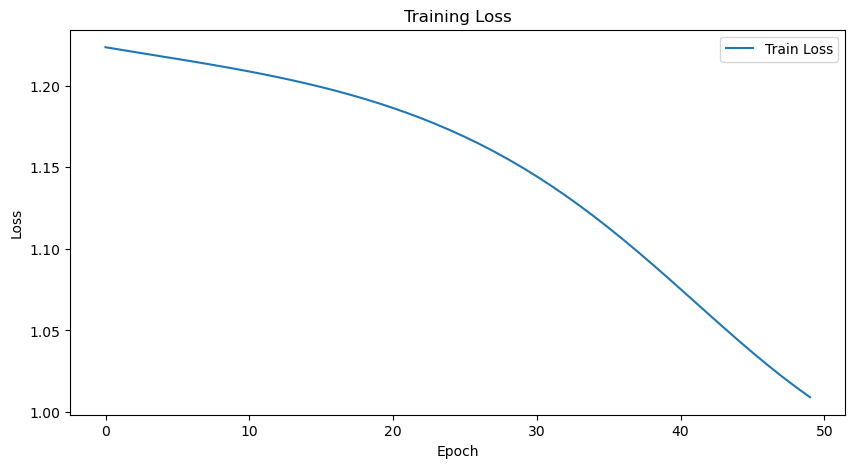

Test Loss: 0.8873


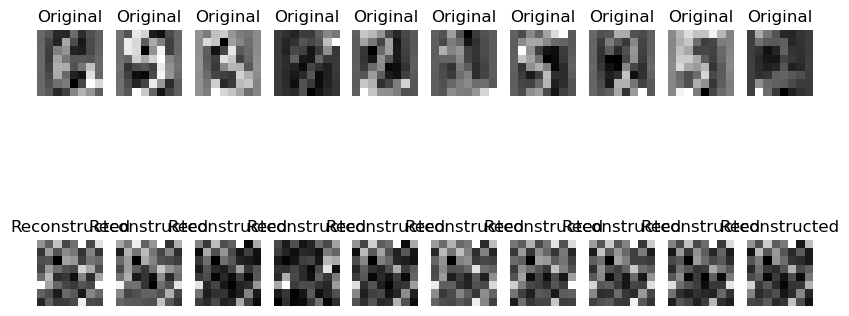

In [4]:
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import load_digits
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Define the Autoencoder class
class Autoencoder(nn.Module):
    def __init__(self):
        super(Autoencoder, self).__init__()
        self.encoder = nn.Sequential(
            nn.Linear(64, 32),  # Input layer size: 64, Hidden layer size: 32
            nn.ReLU(),
            nn.Linear(32, 16)   # Second hidden layer size: 16
        )
        self.decoder = nn.Sequential(
            nn.Linear(16, 32),  # Output layer size matches second hidden layer size: 16
            nn.ReLU(),
            nn.Linear(32, 64),  # Output size matches input size: 64
            nn.Sigmoid()        # Apply sigmoid to ensure output is between 0 and 1
        )

    def forward(self, x):
        x = self.encoder(x)
        x = self.decoder(x)
        return x

# Load and preprocess the dataset
digits = load_digits()
data = digits.data
scaler = StandardScaler()
data = scaler.fit_transform(data)  # Normalize data

# Convert to PyTorch tensors
data_tensor = torch.tensor(data, dtype=torch.float32)

# Split into training and test sets
train_data, test_data = train_test_split(data_tensor, test_size=0.2, random_state=42)
train_data = torch.tensor(train_data, dtype=torch.float32)
test_data = torch.tensor(test_data, dtype=torch.float32)

# Initialize the model, loss function, and optimizer
model = Autoencoder()
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Training the model
num_epochs = 50
train_losses = []

for epoch in range(num_epochs):
    model.train()
    optimizer.zero_grad()

    # Forward pass
    output = model(train_data)
    loss = criterion(output, train_data)
    
    # Backward pass and optimization
    loss.backward()
    optimizer.step()
    
    train_losses.append(loss.item())
    
    if (epoch + 1) % 10 == 0:
        print(f'Epoch [{epoch + 1}/{num_epochs}], Loss: {loss.item():.4f}')

# Plot training loss
plt.figure(figsize=(10, 5))
plt.plot(train_losses, label='Train Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training Loss')
plt.legend()
plt.show()

# Test the model
model.eval()
with torch.no_grad():
    reconstructed = model(test_data)
    test_loss = criterion(reconstructed, test_data)
    print(f'Test Loss: {test_loss.item():.4f}')

# Function to visualize original and reconstructed data
def visualize_results(original, reconstructed, num_samples=10):
    plt.figure(figsize=(10, 5))
    for i in range(num_samples):
        plt.subplot(2, num_samples, i + 1)
        plt.imshow(original[i].reshape(8, 8), cmap='gray')
        plt.title('Original')
        plt.axis('off')

        plt.subplot(2, num_samples, i + 1 + num_samples)
        plt.imshow(reconstructed[i].reshape(8, 8), cmap='gray')
        plt.title('Reconstructed')
        plt.axis('off')
    plt.show()

# Visualize results
visualize_results(test_data.numpy(), reconstructed.numpy())
